# Basic Linear Classifiers for Binary Labelled Data

The goal of this tutorial is to give students a gentle introduction to the most basic form of linear binary classification, along with essential notions of how to measure the goodness of fit of there classifiers. 

## The Problem

We have a dataset from persons, where each person is enconded with the following atrributes:
- Height
- Weight
- Gender

The Gender can be either 1 (Male) or 0 (Female). 
For the Male cases, we will call them Positive cases - which are the cases that we wish to create alerts.
For the Female cases, we will call them Negative cases - which are the cases that we wish not to create alerts.


We want to be able to understand if a person is Male of Female (1 or 0) only by using the `Height` and the `Weight`. 
By using a linear binary classification, we want to draw a line that allow us to segment the Males and the Females.


Let's load the dataset and see how the pairs of (Heigth, Weight) are distributed in the 2d space, taking into consideration the class of the point (either 1 (Male) of 0 (Female)).


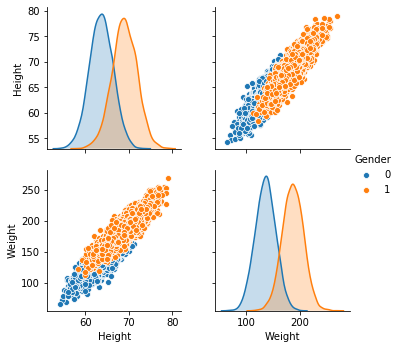

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

############# LOAD DATASET

url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url, error_bad_lines=False)
    
# replacing Male and Female with one and zero

df['Gender'].replace('Female', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)

# reorganising the columns of my dataframe

df = df[['Height', 'Weight', 'Gender']]

########### PLOT
sns.pairplot(df, hue="Gender", vars=['Height', 'Weight'])

Let's interpret the above figure from Top to Bottom, Left to Right:

- [0,0]: This is the distribution of the `Height` variable, segmented by class (Blue for 0 (Female), Orange for 1 (Male)
- [0,1]: This is a scatter plot, where the Y axis is the variable `Height` and the X axis is the variable `Weight`. The color of the point indicates its class
- [1,0]: This is a scatter plot, where the Y axis is the variable `Weight` and the X axis is the variable `Height`. The color of the point indicates its class
- [1,1]: This is the distribution of the `Weight` variable, segmented by class (Blue for 0 (Female), Orange for 1 (Male)

We can see in the distribution of the variables ([0,0] and [1,1]) that we have some overlap, but that information is not quite visible in the scatter plots ([0,1],[1,0]).
Let's plot a figure where we can see this overlap on the scatter plots:

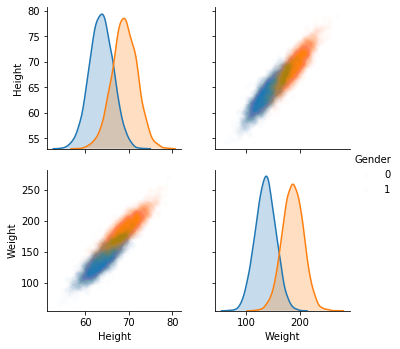

In [2]:
sns.pairplot(df, hue="Gender", vars=['Height', 'Weight'], plot_kws={'alpha': 0.01})

We can now observe that in the positions [0,1] and [1,0] the overlap is visible - and this way we get a notion of the area of overlaping.


So, let's see this same information but now the `Height` will be in the X axis and the `Weight` will be in the Y axis.

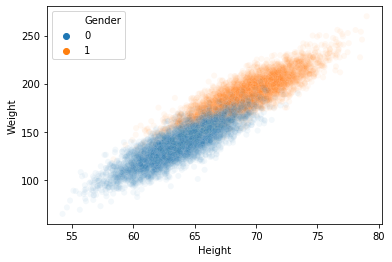

In [3]:
sns.scatterplot(df["Height"],df["Weight"], hue=df["Gender"], alpha= 0.05)

**Where would you draw the line to separate male from female?**

Let's assume that the line is given by the following function: 

In [4]:
def myf(x): return (18/7)*x - (60/7)

And we can see the line on the below plot:

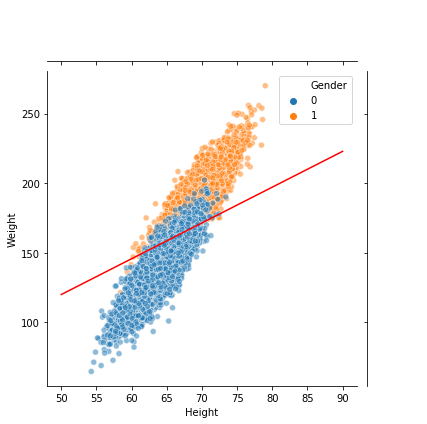

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
   
grid = sns.JointGrid(data = df, x = "Height", y = "Weight")
grid.plot_joint(partial(sns.scatterplot, hue=df.Gender, alpha = 0.5))
#grid.plot_joint(plt.scatter, color=df.Gender)
x = np.linspace(50,90,1000)
y = myf(x)
plt.plot(x,y,c="red")

Well, with this line we are creating a segmentation between Male and Female:
- If a given point is above the line, this model says that the point is a Male: the model will raise an Alert
- If a given point is below the line, this model says that the point is a Female: the model will not raise an Alert

## So now we have a model

Yes, we now have a model.

1. Our model depends on two variables:
- Height
- Weight

2. Our model will use a line in this two-dimentional space to separate the males from the females:
- this line is in the function `myf`, and is defined as: $weight = (18/7)*height - (60/7)$
- with this line, we can check if the true weight is above or below the line
- if the true value is above the line, our model says that the person is Male (therefore, the model raised an alert)
- if the true value is below the line, our model says taht the person is Female (therefore, the model did not raise an alert)


## Measuring the Performance of the model

To assess the performance of the model, we must start by defining what are the possibilities:

1. Model raises an alert, and the alert was - in fact - a positive case: Let's call this a **True Positive**
2. Model raises an alert, but the alert was associated to an event of the negative case: Let's call this a **False Positive**
3. Model does not raise an alert, and the alert was in fact of the negative case: Let's call this a **True Negative**
4. Model does not raises an alert, but the alert was associated to an event of the positive case: Let's call this a **False Negative**

In this setup, we can create a double-entry matrix to define these values where:
- The columns are associated with the Actual (Ground Truth) values
- The lines are associated with the Predicted values 

You can see such a matrix defined in the output of the python cell below.


In [6]:
confusion_matrix = pd.DataFrame(columns=["Positive","Negative"], index=["Alert","Not Alert"])
confusion_matrix.loc["Alert","Positive"] = 'TP'
confusion_matrix.loc["Alert","Negative"] = 'FP'
confusion_matrix.loc["Not Alert","Positive"] = 'FN'
confusion_matrix.loc["Not Alert","Negative"] = 'TN'
confusion_matrix

,Positive,Negative
Alert,TP,FP
Not Alert,FN,TN


So, in order to assess the model performance in a given dataset, we must assess for each element in the dataset that if that element is a **TP**, **FP**, **FN** or a **TN**. 
We accumulate the number of **TP** in the confusion matrix in the line "Alert" and column "Positive" (where the `TP` element is in the output above)

So, an example of a computed Confusion matrix could be as following:

In [7]:
confusion_matrix = pd.DataFrame(columns=["Positive","Negative"], index=["Alert","Not Alert"])
confusion_matrix.loc["Alert","Positive"] = 1023
confusion_matrix.loc["Alert","Negative"] = 452
confusion_matrix.loc["Not Alert","Positive"] = 29
confusion_matrix.loc["Not Alert","Negative"] = 372
confusion_matrix

,Positive,Negative
Alert,1023,452
Not Alert,29,372


Where:
- The number of **TP** is 1023
- The number of **FP** is 452
- The number of **FN** is 29
- The number of **TN** is 372

And now, we can define the following metrics:

- Accuracy: $\frac{TP + TN}{TP + TN + FP * FN}$
- Precision: $\frac{TP}{TP + FP}$
- Recall: $\frac{TP}{TP + FN}$

### What do these metrics tell us?

These metrics can give us information about the performance of the model.

#### Accuracy

This metric tell us how, in general, we are answering the right classes.

If I have 50 Positive examples and 50 Negative examples, this metric can access how accurate is the model in both Positive and Negative classes.
But if I have 3 Positive examples and 97 Negative examples, even if I fail all the Positive cases and got the negative ones right, I will score a 97% with this metric!


#### Precision

So, how does this metric behave if in 3 Positive examples and 97 Negative examples I do not alert one single Positive class?

...

Well, 0/0 is an indetermination - but we do not hold a value for this metric in this case.

And what if in 3 Positive examples and 97 Negative examples I alert 10 times, but all of these alerts are FP?

...

Yup, also 0.

So, this metric measures how "accurate" the model was in alerting positive cases - this is the precision of the model. 
If every alert of the model corresponds to a positive case, we say this model has an high precision.
If almost every alert of the model corresponds to a negative case, we say this model has a low precision (like Peter and the wolf).

#### Recall

So, we now know how to measure the precision of a model - for example an fire alarm.
We want that fire alarm to be as precise as possible - we do not want a false positive.

Nevertheless, we also want that the alarms reacts everytime it has to react! 
If the model alerts almost every time it has to alert, we say the model has an high recall.
If the model does not alert often when it has to alert we say the model has a low recall.

## Exercise 1

For the dataset that is already loaded in the DataFrame `df`, compute the confusion matrix for the linear model explained above.
You are going to need:
- To understand how the model works
- To use de `df` dataframe
- To use the `myf` function line

In [39]:
def get_predicted_value(person_row, myf):
    y_pred = myf(person_row["Height"])
    return 0 if y_pred > person_row["Weight"] else 1

In [17]:
def get_actual_value(df):
    return df["Gender"].values

In [37]:
def compute_confusion_matrix(y_pred, y_actual):
    assert len(y_pred) == len(y_actual)
    assert (set(y_actual) | set(y_pred)) == set(y_pred)
    
    confusion_matrix = pd.DataFrame(columns=["Positive","Negative"], index=["Alert","Not Alert"])
    confusion_matrix.loc["Alert","Positive"] = 0
    confusion_matrix.loc["Alert","Negative"] = 0
    confusion_matrix.loc["Not Alert","Positive"] = 0
    confusion_matrix.loc["Not Alert","Negative"] = 0
    
    for i in range(0, len(y_pred)):
        if y_pred[i] == 1 and y_actual[i] == 1:
            confusion_matrix.loc["Alert","Positive"] += 1
        elif y_pred[i] == 1 and y_actual[i] == 0:
            confusion_matrix.loc["Alert","Negative"] += 1
        elif y_pred[i] == 0 and y_actual[i] == 0:
            confusion_matrix.loc["Not Alert","Negative"] += 1
        else:
            confusion_matrix.loc["Not Alert","Positive"] += 1
    
    return confusion_matrix
        

In [40]:
y_pred = df.apply(lambda row: get_predicted_value(row,myf),axis=1).values

In [41]:
compute_confusion_matrix(y_pred, get_actual_value(df))

,Positive,Negative
Alert,4556,367
Not Alert,444,4633


## Exercise 2

Let's wrap all the things we did before in a function called `report`.
This function has 3 parameters:
- df: a dataframe with the persons
- fn: a function defining the line
- isPrint: a flag variable indicating if we want the function to print or not

This function may print:
- the confusion matrix
- values of recall, precision
- plot of the line defined in `fn` parameter

This function will return a dictionary containing the following pairs (Key, Value)
- "recall": value for recall metric
- "precision": value for precision metric

In [68]:
def recall(cf_df):
    return cf_df.loc["Alert","Positive"]/(cf_df.loc[:,"Positive"].sum())

def precision(cf_df):
    return cf_df.loc["Alert","Positive"]/(cf_df.loc["Alert",:].sum())

def report(df, fn, isPrint = False):
    y_pred = df.apply(lambda row: get_predicted_value(row,fn),axis=1).values
    conf_matrix = compute_confusion_matrix(y_pred, get_actual_value(df))
    metrics_dict = {}
    metrics_dict["recall"] = recall(conf_matrix)
    metrics_dict["precision"] = precision(conf_matrix)
    if isPrint:
        print(conf_matrix)
        
        print(f"In this dataset, this model has a precision of {round(metrics_dict['precision'],4)}")
        print(f"In this dataset, this model has a recall of {round(metrics_dict['recall'],4)}")
        
        grid = sns.JointGrid(data = df, x = "Height", y = "Weight")
        grid.plot_joint(partial(sns.scatterplot, hue=df.Gender, alpha = 0.5))
        #grid.plot_joint(plt.scatter, color=df.Gender)
        x = np.linspace(50,90,1000)
        y = myf(x)
        plt.plot(x,y,c="red")
    
    return metrics_dict

In [45]:
report(df, myf)

{'recall': 0.9112, 'precision': 0.9254519601868779}

           Positive  Negative
Alert          4556       367
Not Alert       444      4633
In this dataset, this model has a precision of 0.9255
In this dataset, this model has a recall of 0.9112


{'recall': 0.9112, 'precision': 0.9254519601868779}

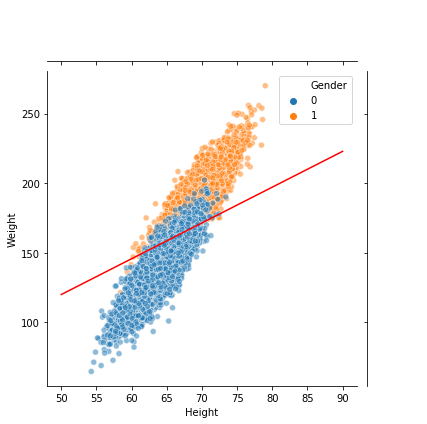

In [46]:
report(df, myf, True)

## Exercise 3

Let's change the function of the line and understand how this affects the model performance!

- make the `m` parameter of the line vary between 2 and 3, with a step of 0.1
- make the `b` parameter of the line vary between 8 and 10, with a step of 0.1

In [62]:
from tqdm.autonotebook import tqdm

/home/tds/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [69]:
stats_results = {}
stats_results["m"] = []
stats_results["b"] = []
stats_results["recall"] = []
stats_results["precision"] = []

for m in tqdm(np.arange(2,3.1, step = 0.1)):
    for b in tqdm(np.arange(8,9, step = 0.1)):
        stats_results["m"].append(m)
        stats_results["b"].append(b)
        res = report(df, lambda x: m*x - b)
        stats_results["recall"].append(res["recall"])
        stats_results["precision"].append(res["precision"])
       


In [70]:
parameter_tunning_stats = pd.DataFrame.from_dict(stats_results)

In [71]:
print(parameter_tunning_stats.head())
print(parameter_tunning_stats.tail())

     m    b  recall  precision
0  2.0  8.0     1.0   0.535504
1  2.0  8.1     1.0   0.535217
2  2.0  8.2     1.0   0.535045
3  2.0  8.3     1.0   0.534531
4  2.0  8.4     1.0   0.533960
       m    b  recall  precision
105  3.0  8.5  0.1866   1.000000
106  3.0  8.6  0.1890   1.000000
107  3.0  8.7  0.1912   1.000000
108  3.0  8.8  0.1924   1.000000
109  3.0  8.9  0.1946   0.998973


And now to get the values of the confusion matrix